<a href="https://colab.research.google.com/github/nicholasl33/ML-Data/blob/main/Iris_KNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Importing our data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

# EDA

In [3]:
#displays the first 5 rows of the data frame
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# lists the columns in the dataframe
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# determine the type of info in the given dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
# resetting the index to 'Id' for better consistency 
df.set_index('Id', inplace=True)

In [12]:
# splitting species and removing the iris part for better identification during knn
df['Species'] = df['Species'].apply(lambda title:title.split('-')[1])

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [38]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


# Starting the prediction modeling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
# choosing to drop species as the testing output 
scaler.fit(df.drop('Species', axis=1))

StandardScaler()

In [19]:
# whole data set minus the target class
scaled_features = scaler.transform(df.drop('Species', axis=1))

In [20]:
# dropping the species column
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [21]:
df_feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [43]:
# creating the testing model, with a test size of 35% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Species'], test_size=0.35)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
# fitting the classifier 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# modeling the prediction 
predict = knn.predict(x_test)

In [48]:
predict

array(['virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(confusion_matrix(y_test, predict))

[[22  0  0]
 [ 0 13  1]
 [ 0  1 16]]


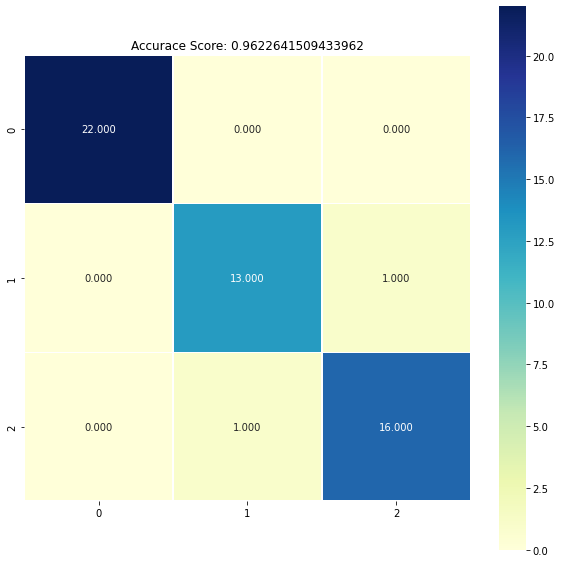

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.3f', linewidth=.5, square=True, cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accurace Score: {knn.score(x_test, y_test)}'
plt.title(all_sample_title, size=12); 

In [52]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



In [53]:
from sklearn import metrics

In [54]:
score = []

In [55]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9811320754716981, 0.9622641509433962, 0.9811320754716981, 0.9811320754716981, 0.9622641509433962, 0.9245283018867925, 0.9245283018867925, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906]


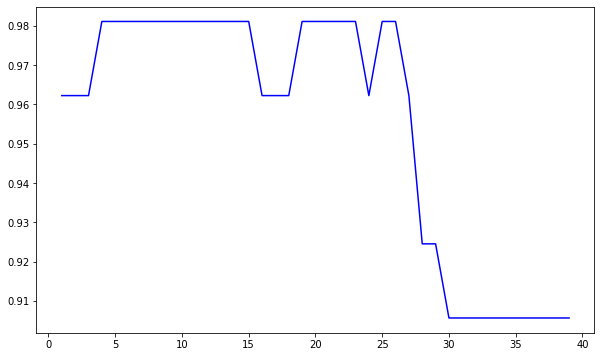

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), score, color='blue')
# x label is value of K of KNN, y label is the testing accuracy

In [57]:
error_rate = []
# Might take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

print(error_rate)

[0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.03773584905660377, 0.018867924528301886, 0.018867924528301886, 0.03773584905660377, 0.07547169811320754, 0.07547169811320754, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944, 0.09433962264150944]


Text(0.5, 1.0, 'Error Rate vs K Value')

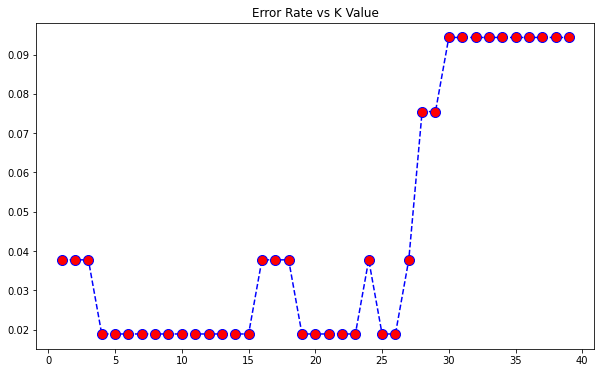

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Error Rate vs K Value')
# x label is K, y label is Error Rate 

# Experimenting with a KNN of 4 to see the difference based on the above graphs I made

In [59]:
knn = KNeighborsClassifier(n_neighbors=4)

In [60]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [61]:
predict = knn.predict(x_test)

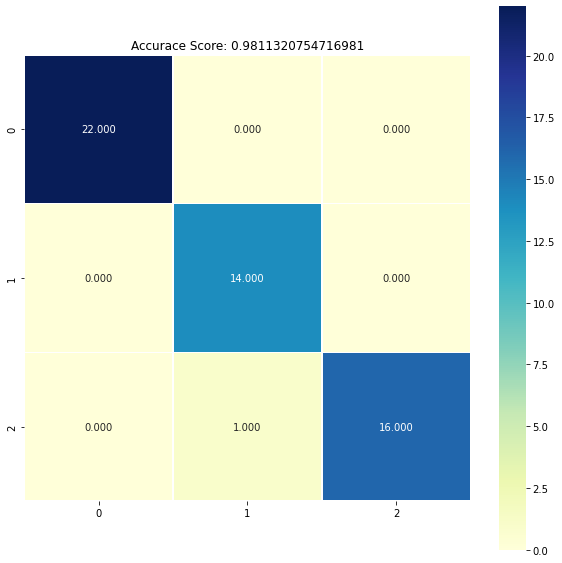

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.3f', linewidth=.5, square=True, cmap='YlGnBu')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accurace Score: {knn.score(x_test, y_test)}'
plt.title(all_sample_title, size=12); 